In [1]:
# import the libraries as shown below
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten,Conv2D
from tensorflow.keras.layers import MaxPooling2D
import os
import shutil
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:

# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

train_path = '/content/drive/MyDrive/data/Malaria/train'
test_path = '/content/drive/MyDrive/data/Malaria/test'

In [ ]:


# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Flow from the directory and load a few samples
data_flow = datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),  # Adjust the target size as needed
    batch_size=20,            # Number of samples to plot
    class_mode='categorical', # If you're doing classification
    shuffle=True,
    seed=42,
    subset='training'  # Use 'training' subset to control the number of samples


)

Found 2775 images belonging to 2 classes.


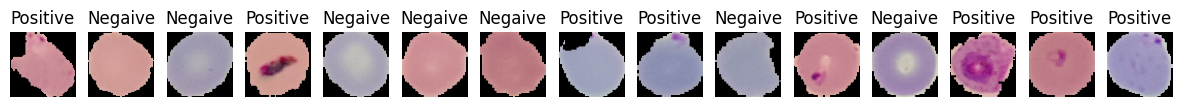

In [ ]:
# Plot the loaded samples
plt.figure(figsize=(15, 8))
num_samples_to_plot = 15  # Adjust this based on your preference
for i in range(num_samples_to_plot):
    img, label = data_flow.next()
    class_name = "Positive" if label[0][0] == 1 else "Negaive"  # Modify this based on your folder names
    plt.subplot(1, num_samples_to_plot, i + 1)
    plt.imshow(img[0])
    plt.title(class_name)  # Adjust this if needed

    plt.axis('off')

    if i + 1 == num_samples_to_plot:
        break  # Exit the loop after plotting the desired number of samples

plt.show()

In [4]:

# Create an ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to be between 0 and 1
    shear_range=0.2,            # Shear intensity for data augmentation
    zoom_range=0.2,             # Zoom intensity for data augmentation
    horizontal_flip=True,       # Horizontal flip for data augmentation
    validation_split=0.2        # Split the dataset into training and validation sets
)

In [ ]:

# Define the target size for resizing the images
target_size = (128, 128)

# Flow from the directory and apply preprocessing
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',   # If you're doing classification
    subset='training'           # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',   # If you're doing classification
    subset='validation'         # Specify 'validation' subset for validation data
)



Found 17636 images belonging to 2 classes.
Found 4408 images belonging to 2 classes.


In [ ]:

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Adjust the number of units based on your classification task



In [ ]:
from keras.models import load_model  # Not used in this snippet

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Save the model to Colab's local storage
model.save('/content/model.h5')

Epoch 1/10
552/552 [==============================] - 5548s 10s/step - loss: 0.4142 - accuracy: 0.8131 - val_loss: 0.4116 - val_accuracy: 0.8566
Epoch 2/10
552/552 [==============================] - 397s 719ms/step - loss: 0.1589 - accuracy: 0.9473 - val_loss: 0.3681 - val_accuracy: 0.8848
Epoch 3/10
552/552 [==============================] - 395s 716ms/step - loss: 0.1393 - accuracy: 0.9538 - val_loss: 0.2898 - val_accuracy: 0.9097
Epoch 4/10
552/552 [==============================] - 398s 721ms/step - loss: 0.1253 - accuracy: 0.9598 - val_loss: 0.2627 - val_accuracy: 0.9213
Epoch 5/10
552/552 [==============================] - 395s 715ms/step - loss: 0.1200 - accuracy: 0.9592 - val_loss: 0.2338 - val_accuracy: 0.9281
Epoch 6/10
552/552 [==============================] - 406s 736ms/step - loss: 0.1176 - accuracy: 0.9603 - val_loss: 0.2485 - val_accuracy: 0.9285
Epoch 7/10
552/552 [==============================] - 398s 720ms/step - loss: 0.1117 - accuracy: 0.9605 - val_loss: 0.2899 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# Save the model to Colab's local storage
model.save('/content/model.keras')

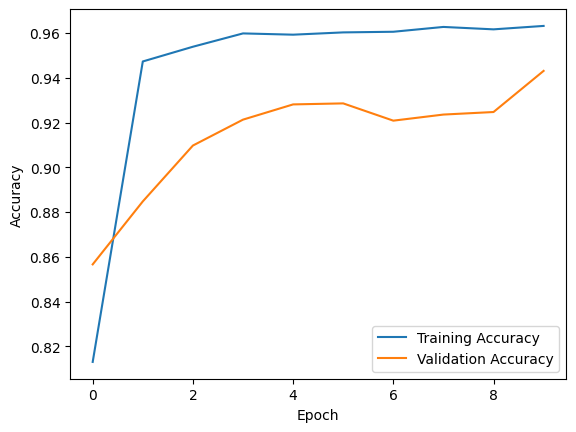

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),  # Adjust the target size
    batch_size=32,
    class_mode='categorical',  # If doing classification
    shuffle=False  # Set to False to keep the order of predictions for evaluation
)

Found 2775 images belonging to 2 classes.


In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

87/87 [==============================] - 49s 555ms/step - loss: 0.1286 - accuracy: 0.9546
Test Loss: 0.12861701846122742
Test Accuracy: 0.954594612121582


87/87 [==============================] - 690s 8s/step


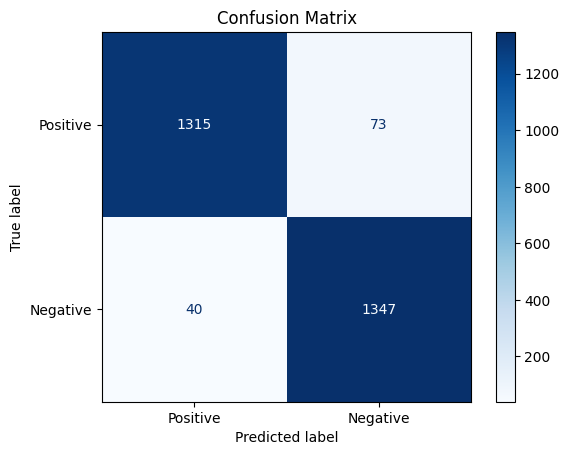

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('/content/model.h5')

# Assuming 'test_generator' is defined earlier

# Get predicted probabilities from the model
predicted_probabilities = model.predict(test_generator)

# Get the predicted classes from the probabilities
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Extract true labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Positive", "Negative"])
display.plot(cmap=plt.cm.Blues)  # Plot confusion matrix using matplotlib
plt.title('Confusion Matrix')
plt.show()
